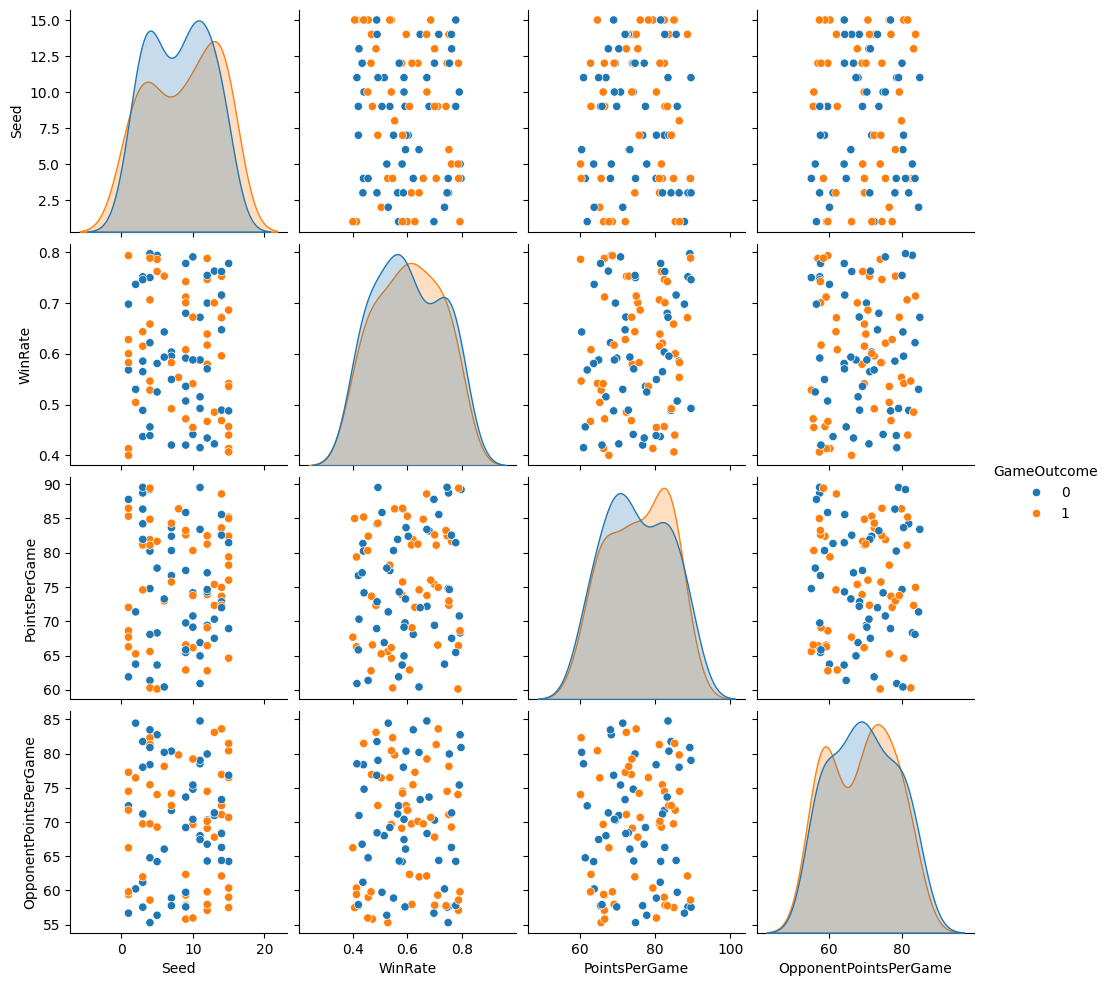

ValueError: Input X contains NaN.
LogisticRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Generate simulated NCAA basketball dataset
np.random.seed(0)
teams = ['TeamA', 'TeamB', 'TeamC', 'TeamD', 'TeamE']
data = {'Team': np.random.choice(teams, size=100),
        'Seed': np.random.randint(1, 16, size=100),
        'WinRate': np.random.uniform(0.4, 0.8, size=100),
        'PointsPerGame': np.random.uniform(60, 90, size=100),
        'OpponentPointsPerGame': np.random.uniform(55, 85, size=100),
        'GameOutcome': np.random.choice([0, 1], size=100)}  # 0: Loss, 1: Win

df = pd.DataFrame(data)

# Data visualization
sns.pairplot(df[['Seed', 'WinRate', 'PointsPerGame', 'OpponentPointsPerGame', 'GameOutcome']], hue='GameOutcome')
plt.show()

# Feature engineering
df['WinStreak'] = df.groupby('Team')['GameOutcome'].transform(lambda x: x.rolling(5).mean().shift())
df['PointDifference'] = df['PointsPerGame'] - df['OpponentPointsPerGame']

# Model training and prediction
X = df[['Seed', 'WinRate', 'PointsPerGame', 'OpponentPointsPerGame', 'WinStreak', 'PointDifference']]
y = df['GameOutcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Logistic Regression
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_predictions = lr.predict(X_test)

# Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=0)
rf.fit(X_train, y_train)
rf_predictions = rf.predict(X_test)

# Model evaluation
print("Logistic Regression Accuracy:", accuracy_score(y_test, lr_predictions))
print("Random Forest Accuracy:", accuracy_score(y_test, rf_predictions))

# Confusion matrix for Random Forest
rf_conf_matrix = confusion_matrix(y_test, rf_predictions)
sns.heatmap(rf_conf_matrix, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [3]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: scikit-learn in c:\users\dylan\appdata\local\packages\pythonsoftwarefoundation.python.3.11_qbz5n2kfra8p0\localcache\local-packages\python311\site-packages (1.4.1.post1)




[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: C:\Users\dylan\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip
